# Fold left e Alberi


## Fold-left

Pensiamo alla funzione `sum` che somma tutti i numeri in una lista, scritta usando un **accumulatore**

In [ ]:
let rec somma a lis =
    match lis with
    | [] -> a
    | x::lis' -> somma (a+x) lis' ;;
    
somma 0 [3;2;4] ;;

Il risultato parziale viene **passato come parametro** (inizialmente zero) e aggiornato man mano che si incontrano nuovi elementi scandendo la lista dall'inizio alla fine (**da sinistra**)

ogni elemento viene combinato con il risultato parziale degli **elementi precedenti**, non successivi

La funzione `fold_left` realizza lo stesso schema ricorsivo

In [ ]:
let rec fold_left f a lis =
    match lis with
    | [] -> a
    | x::lis' -> fold_left f (f a x) lis' ;;

Prevede i parametri (oltre alla lista `lis`):

* `f`: la funzione da applicare ad ogni passo
* `a`: il valore iniziale da cui partire con il calcolo

Ad ogni passo, richiama ricorsivamente `f` passandogli un valore via via aggiornato

Ora possiamo usare `fold_left` per definire `somma` usando la ricorsione in modo implicito

In [ ]:
let somma lis = fold_left (+) 0 lis ;;
somma [3;2;4] ;;

**ATTENZIONE:** rispetto alla versione con `fold_right`, i parametri di `f` sono invertiti e anche quelli di `fold_left` hanno un ordine diverso. 
> Fold destra, accumulatore a destra
>
> Fold sinistra, accumulatore a sinistra

## Esercizi:

### Es. 1

Usando `fold_left`, scrivere una funzione `take n l` che prende un interno `n` e una lista `l`, e restituisce solo la sottolista iniziale di `n` elementi di `l`. Non usare `List.lenght`

## Le funzioni su liste nel modulo `List`

Le funzioni higher-order su liste sono disponibili nel modulo `List` della libreria standard di OCaml (https://ocaml.org/api/List.html)

* `List.exists`
* `List.for_all`
* `List.filter`
* `List.map`
* `List.fold_right`
* `List.fold_left`

Oltre a molte altre funzioni utili:

* `List.find`, `List.sort`, `List.partition`, `List.merge`,...

## Alberi e tipi algebrici
Usando i tipi algebrici di OCaml, possiamo definire un tipo per gli **alberi pieni** 

In [ ]:
 type fullTree = Leaf of int | Node of int * fullTree * fullTree;;

Ad esempio, possiamo rappresentare il seguente albero come 

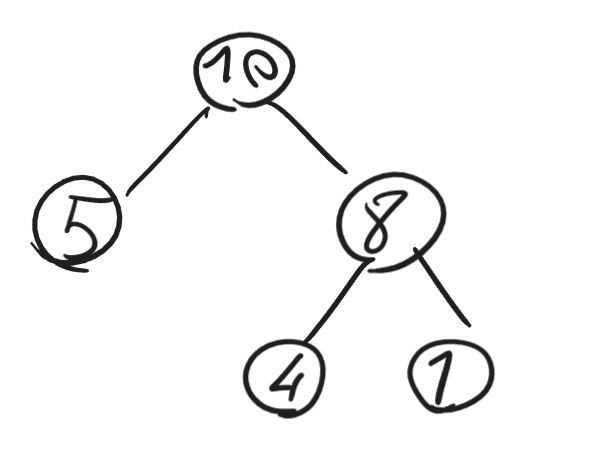

In [ ]:
let tree = Node(10, Leaf(5), Node(8, Leaf(4), Leaf(1)));;

## Esericizi

### Es 2:
Scrivere una funzione ricorsiva `getLeaves t` che prenda un albero `t` e restiuisca una lista contenente tutte le sue foglie, in qualsiasi ordine

    getLeaves tree = [5, 4, 1] 

### Es 3:

Un **heap** è un albero dove ogni nodo interno è maggiore o uguale di tutti i nodi nel suo sottoalbero sinistro e destro. Ad esempio, `tree`dell'esempio sopra è un heap.

Scrivere una funzione `getHeapMax t` che prende un albero `t` e restituisce un risultato di tipo `int option`:
- Se l'albero è un heap, allora deve restituire `Some n` dove `n` è il massimo dell'heap
- Se l'albero non è un heap, allora deve restituire `None`

Ricordate che la definizione di `int option` è 

    type int option = None | Some of int